## Seminar 1: Fun with Word Embeddings (3 points)

Today we gonna play with word embeddings: train our own little embedding, load one from   gensim model zoo and use it to visualize text corpora.

This whole thing is gonna happen on top of embedding dataset.

__Requirements:__  `pip install --upgrade nltk gensim bokeh` , but only if you're running locally.


* **nltk** → Natural Language Toolkit (used for NLP tasks like tokenization, stemming, POS tagging, etc.).
* **gensim** → Library for topic modeling, word embeddings (Word2Vec, FastText), and similarity search.
* **bokeh** → Interactive visualization library for building dashboards and plots in the browser.



In [1]:
pip install --upgrade nltk gensim bokeh

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.6/26.6 MB 76.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 120.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 110.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.2/38.2 MB 15.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.2
    Uninstalling scipy-1.16.2:
      Successfully uninstalled scipy-1.16.2
  Attempting uninstall: bokeh
    Found existing installation: bokeh 3.7.3
    Uninstalling bokeh-3.7.3:
      Successfully uninstalled bokeh-3.7.3
ERROR: pip's dependency resolver does not currently take into account all the

In [1]:
# download the data:
!wget https://www.dropbox.com/s/obaitrix9jyu84r/quora.txt?dl=1 -O ./quora.txt
# alternative download link: https://yadi.sk/i/BPQrUu1NaTduEw

--2025-09-30 03:38:21--  https://www.dropbox.com/s/obaitrix9jyu84r/quora.txt?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:601c:18::a27d:612
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/p0t2dw6oqs6oxpd6zz534/quora.txt?rlkey=bjupppwua4zmd4elz8octecy9&dl=1 [following]
--2025-09-30 03:38:21--  https://www.dropbox.com/scl/fi/p0t2dw6oqs6oxpd6zz534/quora.txt?rlkey=bjupppwua4zmd4elz8octecy9&dl=1
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc186224e97d53a6153c87a48119.dl.dropboxusercontent.com/cd/0/inline/CyWkuaVHuvrCaCD7Cswor1KHZzW0ZyzFwSgGL7ruxxT3wIAS9OfvTb1NCziiFygfmekz0vkxPttvQeyP178U15Pyd3lppcZ5z81DgC5L-GFvkEOTtiToUyHcOwE3itx6ae4/file?dl=1# [following]
--2025-09-30 03:38:21--  https://uc186224e97d53a6153c87a48119.dl.dropboxusercontent.com/cd/0/inline/CyWkuaVHuvr

In [2]:
import numpy as np

data = list(open("./quora.txt", encoding="utf-8"))
data[50]

"What TV shows or books help you read people's body language?\n"

__Tokenization:__ a typical first step for an nlp task is to split raw data into words.
The text we're working with is in raw format: with all the punctuation and smiles attached to some words, so a simple str.split won't do.

Let's use __`nltk`__ - a library that handles many nlp tasks like tokenization, stemming or part-of-speech tagging.

In [3]:
from nltk.tokenize import WordPunctTokenizer
tokenizer = WordPunctTokenizer()

print(tokenizer.tokenize(data[50]))

['What', 'TV', 'shows', 'or', 'books', 'help', 'you', 'read', 'people', "'", 's', 'body', 'language', '?']


### ✅ How it works

* It uses a **regular expression** internally:

  ```regex
  \w+|[^\w\s]+
  ```

  This means:

  * `\w+` → match words (letters, digits, underscore).
  * `[^\w\s]+` → match anything that is not a word character or whitespace (i.e., punctuation).

So the tokenizer treats punctuation as **separate tokens** instead of attaching them to words.

---

### 🔹 Example

```python
from nltk.tokenize import WordPunctTokenizer

tokenizer = WordPunctTokenizer()
text = "Hello, world! I'm testing NLTK's tokenizer."

tokens = tokenizer.tokenize(text)
print(tokens)
```

**Output:**

```python
['Hello', ',', 'world', '!', 'I', "'", 'm', 'testing', 'NLTK', "'", 's', 'tokenizer', '.']
```

Notice:

* `"I'm"` becomes `["I", "'", "m"]`.
* `"NLTK's"` becomes `["NLTK", "'", "s"]`.
* Punctuation like `,` and `!` are **separate tokens**.

---

### 🔹 When to use

* Useful if you want **fine-grained control** over words and punctuation (e.g., training models that need punctuation tokens).
* Less useful if you want **whole words only** — in that case, use `nltk.word_tokenize`.



In [4]:
# TASK: lowercase everything and extract tokens with tokenizer.
# data_tok should be a list of lists of tokens for each line in data.

data_tok = [tokenizer.tokenize(line.lower()) for line in data]
data_tok[:5]

[['can',
  'i',
  'get',
  'back',
  'with',
  'my',
  'ex',
  'even',
  'though',
  'she',
  'is',
  'pregnant',
  'with',
  'another',
  'guy',
  "'",
  's',
  'baby',
  '?'],
 ['what',
  'are',
  'some',
  'ways',
  'to',
  'overcome',
  'a',
  'fast',
  'food',
  'addiction',
  '?'],
 ['who',
  'were',
  'the',
  'great',
  'chinese',
  'soldiers',
  'and',
  'leaders',
  'who',
  'fought',
  'in',
  'ww2',
  '?'],
 ['what', 'are', 'zip', 'codes', 'in', 'the', 'bay', 'area', '?'],
 ['why',
  'was',
  'george',
  'rr',
  'martin',
  'critical',
  'of',
  'jk',
  'rowling',
  'after',
  'losing',
  'the',
  'hugo',
  'award',
  '?']]

In [6]:
# ✅ Check 1: Ensure that each row in data_tok is a list (or tuple) of tokens
assert all(isinstance(row, (list, tuple)) for row in data_tok), \
    "please convert each line into a list of tokens (strings)"

# ✅ Check 2: Ensure that every element inside each row is a string (i.e., tokens are strings)
assert all(all(isinstance(tok, str) for tok in row) for row in data_tok), \
    "please convert each line into a list of tokens (strings)"

# Define a helper function to check if a token is composed entirely of Latin letters
is_latin = lambda tok: all('a' <= x.lower() <= 'z' for x in tok)

# ✅ Check 3: Ensure all Latin text is lowercased
# - Join tokens in each row into a single string
# - If it contains only Latin letters, verify that it is lowercase
assert all(
    map(lambda line: not is_latin(line) or line.islower(), map(' '.join, data_tok))
), "please make sure to lowercase the data"


In [7]:
print([' '.join(row) for row in data_tok[:2]])

["can i get back with my ex even though she is pregnant with another guy ' s baby ?", 'what are some ways to overcome a fast food addiction ?']


__Word vectors:__ as the saying goes, there's more than one way to train word embeddings. There's Word2Vec and GloVe with different objective functions. Then there's fasttext that uses character-level models to train word embeddings.

The choice is huge, so let's start someplace small: __gensim__ is another nlp library that features many vector-based models incuding word2vec.

# 🔹 Word2Vec Training Process

Word2Vec is a **shallow neural network** that learns to predict word-context relationships.
There are two main architectures:

1. **CBOW (Continuous Bag of Words)**

   * Input: a group of context words
   * Output: the target word
   * Example: for the sentence `"The cat sat on the mat"`, if the target is `"sat"`, the model uses `["the", "cat", "on", "the"]` to predict `"sat"`.

2. **Skip-Gram**

   * Input: the target word
   * Output: predict surrounding context words
   * Example: with target `"sat"`, the model tries to predict `["the", "cat", "on", "the"]`.

👉 In **gensim**, the default is **CBOW** (`sg=0`). You can switch to Skip-Gram with `sg=1`.

---

# 🔹 Role of the Context Window

The **`window` parameter** defines how many words before and after the target word are considered as context.

Example sentence:

```text
"The cat sat on the mat"
```

If:

* `window=2`
* Target word = `"sat"`

Then context = `[ "the", "cat", "on", "the" ]` (2 before, 2 after).

---

### Intuition:

* **Small window (e.g., 2–5)** → captures **syntactic/functional similarity** (words that occur in similar grammatical roles).

  * `"run"` and `"walk"` may be close because they often occur in the same short-range contexts.
* **Large window (e.g., 10)** → captures **semantic similarity** (words about similar topics).

  * `"doctor"` and `"hospital"` may be close, even if they aren’t side-by-side.

---

# 🔹 Optimization Objective

Word2Vec learns embeddings by maximizing the probability of predicting the right context words.
The probability of a context word given a target word is defined using **softmax**:

## Skip-gram Softmax Probability

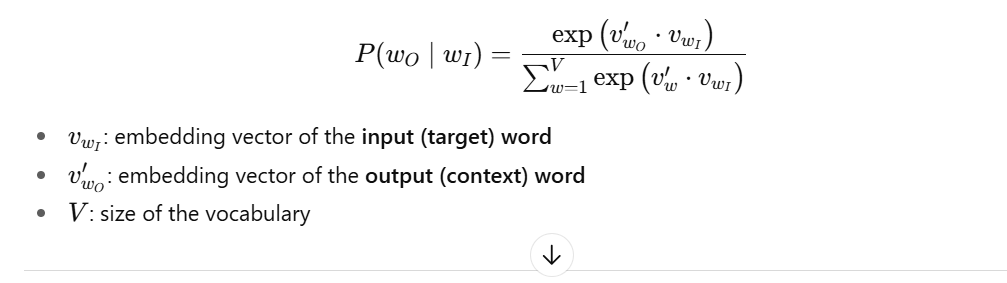
Since computing the denominator for all words is expensive, Word2Vec uses:

* **Negative Sampling** (default in gensim)
* Or **Hierarchical Softmax** (optional)

---

# 🔹 In gensim

When you train:

```python
model = Word2Vec(
    sentences=data_tok,
    vector_size=32,
    window=5,     # context window
    min_count=5,
    sg=1          # use skip-gram (set to 0 for CBOW)
)
```

* Each training step picks a **target word**.
* Collects `window` words on each side as **positive context pairs**.
* Also generates random **negative samples** (words unlikely to be in context).
* Updates embeddings so positive pairs are closer and negative pairs are farther.

---

# 🔹 Example in practice

If your sentence is:

```text
"I enjoy drinking hot coffee every morning"
```

With `window=2`, and `sg=1` (skip-gram):

* Target = `"drinking"`
* Context pairs = `[("drinking", "I"), ("drinking", "enjoy"), ("drinking", "hot"), ("drinking", "coffee")]`
* Plus negative samples like `("drinking", "car")`, `("drinking", "banana")`

The model learns:

* `"drinking"` is close to `"coffee"`, `"tea"`, `"beverage"` in vector space.

---

✅ In short:

* The **context window** decides how much "neighborhood" the model considers.
* **Training** nudges vectors so that words appearing in similar contexts end up close together in embedding space.


# 🔹 Classical Word2Vec (theory)

* In the **original papers**, the input word is represented as a **one-hot vector** of length = vocabulary size.
* If vocab size (V = 100{,}000), that vector would look like:
  `[0, 0, 0, ... 1 ... 0, 0]` (100k elements, mostly zeros).
* Multiplying this one-hot by the weight matrix (W \in \mathbb{R}^{V \times N}) simply **selects one row** (the embedding of that word).

👉 But storing and multiplying full one-hot vectors would be **hugely wasteful**.

---

# 🔹 What gensim does in practice

* Instead of actually creating one-hot vectors, gensim uses the **word’s integer index** (its ID in the vocabulary).
* Example:

  * `"cat"` = index 512
  * `"dog"` = index 1337
* Then gensim just **looks up row 512 of (W)**, instead of multiplying a giant one-hot.

So:

* **One-hot vectors are conceptual only**.
* In reality, gensim keeps:

  * An **embedding matrix (W)** (shape (V \times N))
  * A **vocabulary dictionary** mapping word → index

When training, gensim:

1. Finds the integer index of the word (via vocab dict).
2. Directly fetches the corresponding row from the embedding matrix.

---

# 🔹 Where things are stored

* Vocabulary mapping: `model.wv.key_to_index` (word → index)
* Embedding matrix: `model.wv.vectors` (NumPy array, shape `[V, N]`)

Example:

```python
print(model.wv.key_to_index["dog"])   # e.g. 1337
print(model.wv.vectors.shape)         # (V, 32)
print(model.wv["dog"].shape)          # (32,) → embedding of "dog"
```

---

✅ So to answer you directly:

* **One-hot vectors are never stored** (they are just an idea for how the math works).
* Gensim replaces them with **efficient integer indexing** into the embedding matrix.


In [9]:
from gensim.models import Word2Vec

# Train Word2Vec model
model = Word2Vec(
    sentences=data_tok,   # your tokenized sentences
    vector_size=32,       # embedding vector size
    window=5,             # context window size
    min_count=5,          # ignore words with total frequency < 5
    workers=4             # parallelization (set based on CPU cores)
)

# Access the KeyedVectors (word vectors)
wv = model.wv


In [11]:
# now you can get word vectors !
wv['coffee']

array([-2.0423462e+00, -2.0054679e+00, -1.4333248e-01, -7.4365938e-01,
       -1.1975869e+00, -1.5953760e+00,  2.2534728e+00,  4.5905414e-01,
        6.1650330e-01,  5.6228459e-01, -7.2874767e-03, -3.8930950e-01,
        7.4759072e-01,  1.6197788e+00,  4.9388221e-01,  4.0008952e-03,
        4.0123084e-01, -3.4540956e+00, -4.1496201e+00, -8.3979434e-01,
       -9.5983362e-01,  1.1993283e+00, -3.5154718e-01, -1.8843369e+00,
        1.5084225e+00,  4.9478003e-01, -1.0617627e-01, -1.1786098e+00,
        1.3009177e+00,  7.8300214e-01, -9.7595036e-01,  1.6359425e+00],
      dtype=float32)

In [13]:
# or query similar words directly. Go play with it!
wv.most_similar('bread')

[('rice', 0.9530182480812073),
 ('soup', 0.9298695921897888),
 ('sauce', 0.9286038875579834),
 ('cheese', 0.9179543852806091),
 ('chocolate', 0.915020227432251),
 ('corn', 0.9141954183578491),
 ('butter', 0.9092555642127991),
 ('fruit', 0.9048038721084595),
 ('beans', 0.9030898809432983),
 ('chicken', 0.9018431901931763)]

### Using pre-trained model

Took it a while, huh? Now imagine training life-sized (100~300D) word embeddings on gigabytes of text: wikipedia articles or twitter posts.

Thankfully, nowadays you can get a pre-trained word embedding model in 2 lines of code (no sms required, promise).

In [14]:
import gensim.downloader as api
model = api.load('glove-twitter-100')

[==================================================] 100.0% 387.1/387.1MB downloaded


Nice 🎯 — you’re now stepping into how to **query semantic relationships** from your trained Word2Vec model. Let’s break down exactly what

```python
model.most_similar(positive=["coder", "money"], negative=["brain"])
```

does:

---

# 🔹 1. Vector arithmetic

* Each word has an embedding vector, e.g.

  * (v_{\text{coder}})
  * (v_{\text{money}})
  * (v_{\text{brain}})

* Gensim computes:

[
v_{\text{query}} = v_{\text{coder}} + v_{\text{money}} - v_{\text{brain}}
]

This is the "analogy vector".

---

# 🔹 2. Similarity search

* Then it finds the **most similar words** (by cosine similarity) to this new vector (v_{\text{query}}).

---

# 🔹 3. Result

The output will be a **list of tuples** like:

```python
[("developer", 0.72), ("startup", 0.68), ("salary", 0.65), ...]
```

* Each entry = `(word, similarity_score)`
* The words are ranked by how close their embeddings are to the computed query vector.

---

# 🔹 4. Intuition

You’re basically asking:

> *"Which word is to `coder` and `money` as something else is to `brain`?"*

Or rephrased:

> *"What concept do I get if I combine coder + money but remove brain?"*

---

⚡ This is the same trick behind famous analogies like:

```python
model.most_similar(positive=["king", "woman"], negative=["man"])
# → [('queen', 0.73), ...]
```

---

Would you like me to also show you **how to visualize this vector arithmetic** (e.g., plotting coder, money, brain, and the result on a 2D PCA plot)? That way you’d literally see how the subtraction/addition moves the vectors.


In [15]:
model.most_similar(positive=["coder", "money"], negative=["brain"])

[('broker', 0.5820155739784241),
 ('bonuses', 0.5424473285675049),
 ('banker', 0.5385112762451172),
 ('designer', 0.5197198390960693),
 ('merchandising', 0.4964233338832855),
 ('treet', 0.4922019839286804),
 ('shopper', 0.4920562207698822),
 ('part-time', 0.4912828207015991),
 ('freelance', 0.4843311905860901),
 ('aupair', 0.4796452522277832)]

### Visualizing word vectors

One way to see if our vectors are any good is to plot them. Thing is, those vectors are in 30D+ space and we humans are more used to 2-3D.

Luckily, we machine learners know about __dimensionality reduction__ methods.

Let's use that to plot 1000 most frequent words

In [21]:
# Get the top 1000 most frequent words from the model's vocabulary

# Step 1: Sort all words in the vocabulary
words = sorted(
    model.key_to_index.keys(),             # all words in the vocabulary
    key=lambda word: model.get_vecattr(word, "count"),  # sort by how many times the word appeared in training
    reverse=True                           # sort in descending order (most frequent first)
)[:1000]                                   # take only the top 1000 words

# Step 2: Print every 100th word (0th, 100th, 200th, ..., 900th)
print(words[::100])




['<user>', '_', 'please', 'apa', 'justin', 'text', 'hari', 'playing', 'once', 'sei']


In [22]:
print(words[:5])

['<user>', '.', ':', 'rt', ',']



```python
# For each word in the vocabulary, get its vector representation
word_vectors = {word: model[word] for word in model.key_to_index.keys()}

# Example: print the vector of the word "king"
print(word_vectors["king"])
```

### Explanation:

* `model[word]` → returns the embedding vector (a NumPy array) of that word.
* `model.key_to_index.keys()` → iterates through all words in the vocabulary.
* The dictionary comprehension `{word: model[word] for word in ...}` → builds a dictionary mapping each word to its vector.

⚡ If you want *just the vectors* (without word keys), you can also do:

```python
word_vectors = model.vectors  # a NumPy array of shape (vocab_size, embedding_dim)
```


In [26]:
# For each word in the vocabulary, get its vector representation
word_vectors = np.array([model[word] for word in words])

In [27]:
assert isinstance(word_vectors, np.ndarray)
assert word_vectors.shape == (len(words), 100)
assert np.isfinite(word_vectors).all()

#### Linear projection: PCA

The simplest linear dimensionality reduction method is __P__rincipial __C__omponent __A__nalysis.

In geometric terms, PCA tries to find axes along which most of the variance occurs. The "natural" axes, if you wish.

<img src="https://github.com/yandexdataschool/Practical_RL/raw/master/yet_another_week/_resource/pca_fish.png" style="width:30%">


Under the hood, it attempts to decompose object-feature matrix $X$ into two smaller matrices: $W$ and $\hat W$ minimizing _mean squared error_:

$$\|(X W) \hat{W} - X\|^2_2 \to_{W, \hat{W}} \min$$
- $X \in \mathbb{R}^{n \times m}$ - object matrix (**centered**);
- $W \in \mathbb{R}^{m \times d}$ - matrix of direct transformation;
- $\hat{W} \in \mathbb{R}^{d \times m}$ - matrix of reverse transformation;
- $n$ samples, $m$ original dimensions and $d$ target dimensions;



### 1. What PCA does

* Word embeddings usually have **high dimensionality** (e.g., 100, 300, 768 dimensions).
* To **visualize** them on a 2D plane (scatter plot), we need to **reduce their dimensionality**.
* **PCA** is a mathematical technique that projects data into a lower-dimensional space while keeping as much variance (information) as possible.

---

### 2. How PCA works (intuitively)

* Imagine your data points are clouds of dots in 100D space.
* PCA finds **new axes (principal components)** such that:

  * The **first axis (PC1)** captures the most variance in the data.
  * The **second axis (PC2)** captures the next most variance, orthogonal to PC1.
* By keeping only the first 2 axes, you can **plot words in 2D** and still see meaningful relationships.

---

### 3. Why normalize after PCA

* After PCA, the projected vectors can have arbitrary scale and offset.
* Normalizing to **zero mean and unit variance** ensures that:

  * No axis dominates the visualization due to scaling.
  * The scatter plot is centered and comparable across different runs.


In [28]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Step 1: Reduce to 2D with PCA
pca = PCA(n_components=2)
word_vectors_pca = pca.fit_transform(word_vectors)

# Step 2: Normalize (zero mean, unit variance)
scaler = StandardScaler()
word_vectors_pca = scaler.fit_transform(word_vectors_pca)

print("Word vectors after PCA:", word_vectors_pca.shape)
print("Mean (should be ~0):", word_vectors_pca.mean(axis=0))
print("Std (should be ~1):", word_vectors_pca.std(axis=0))


Word vectors after PCA: (1000, 2)
Mean (should be ~0): [-2.7477741e-08  6.0945751e-09]
Std (should be ~1): [1.0000004 1.       ]


In [29]:
assert word_vectors_pca.shape == (len(word_vectors), 2), "there must be a 2d vector for each word"
assert max(abs(word_vectors_pca.mean(0))) < 1e-5, "points must be zero-centered"
assert max(abs(1.0 - word_vectors_pca.std(0))) < 1e-2, "points must have unit variance"

#### Let's draw it!

In [32]:
import bokeh.models as bm, bokeh.plotting as pl
from bokeh.io import output_notebook

# Make sure Bokeh outputs plots directly inside the notebook
output_notebook()

def draw_vectors(x, y, radius=10, alpha=0.25, color='blue',
                 width=600, height=400, show=True, **kwargs):
    """
    Draws an interactive scatter plot for word vectors (or any 2D data).
    Includes hover info for extra metadata (like word labels).

    Parameters:
    - x, y: coordinates of points (e.g., PCA-reduced embeddings)
    - radius: point size
    - alpha: transparency
    - color: point color (single string or list of colors)
    - width, height: figure size
    - show: whether to display the plot immediately
    - **kwargs: additional metadata to display on hover (e.g., words)
    """

    # If a single color is given (e.g., "blue"), broadcast it to all points
    if isinstance(color, str):
        color = [color] * len(x)

    # Create a Bokeh ColumnDataSource to store data for plotting
    # This ties together x, y, color, and any extra info for hover display
    data_source = bm.ColumnDataSource({
        'x' : x,
        'y' : y,
        'color': color,
        **kwargs
    })

    # Create a figure with zoom enabled via mouse wheel
    fig = pl.figure(active_scroll='wheel_zoom', width=width, height=height)

    # Add scatter points to the figure
    fig.scatter('x', 'y', size=radius, color='color', alpha=alpha, source=data_source)

    # Add hover tooltips: show metadata (from kwargs) when hovering over points
    fig.add_tools(bm.HoverTool(tooltips=[(key, "@" + key) for key in kwargs.keys()]))

    # Show the plot if requested
    if show:
        pl.show(fig)

    # Return the figure object (so you can reuse or modify later)
    return fig


In [33]:
draw_vectors(word_vectors_pca[:, 0], word_vectors_pca[:, 1], token=words)

# hover a mouse over there and see if you can identify the clusters

figure(id='p1064', ...)

### Visualizing neighbors with t-SNE
PCA is nice but it's strictly linear and thus only able to capture coarse high-level structure of the data.

If we instead want to focus on keeping neighboring points near, we could use TSNE, which is itself an embedding method. Here you can read __[more on TSNE](https://distill.pub/2016/misread-tsne/)__.

## 1. What is t-SNE?

**t-SNE (t-distributed Stochastic Neighbor Embedding)** is a **non-linear dimensionality reduction** algorithm designed for visualization.

* PCA finds **global directions of variance** (linear projections).
* t-SNE focuses on **local neighborhoods**: it tries to keep *similar points close together* and *dissimilar points far apart* in the 2D (or 3D) space.

That’s why t-SNE usually produces clusters where similar words or phrases group tightly.

---

## 2. How t-SNE works (intuition)

1. Start with high-dimensional vectors (e.g., 100D word embeddings).
2. Compute **pairwise similarities** between points based on probability distributions.

   * Similar items → high probability.
   * Dissimilar items → low probability.
3. Map data into 2D/3D and **adjust positions** so the similarity structure is preserved.

   * Uses a **“student-t distribution”** to prevent distant points from crowding together.
4. The result: clusters are more visually separated than PCA.

---

## 3. Why normalize after t-SNE

* Just like PCA, the output of t-SNE can be shifted or scaled arbitrarily.
* Normalization (zero mean, unit variance) makes the visualization **balanced** and easy to interpret.

---

## 4. Your code (annotated)

```python
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# Step 1: Initialize t-SNE (map to 2D for visualization)
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)

# Step 2: Fit-transform word vectors
word_tsne = tsne.fit_transform(word_vectors)

# Step 3: Normalize results (zero mean, unit variance)
scaler = StandardScaler()
word_tsne = scaler.fit_transform(word_tsne)
```

---

## 5. PCA vs. t-SNE for embeddings

| **Aspect**           | **PCA** 🧮                               | **t-SNE** 🎨                    |
| -------------------- | ---------------------------------------- | ------------------------------- |
| **Type**             | Linear projection                        | Non-linear, probabilistic       |
| **Goal**             | Preserve global variance                 | Preserve local neighborhoods    |
| **Speed**            | Fast                                     | Much slower                     |
| **Interpretability** | Easy (directions = principal components) | Harder (no simple axes meaning) |
| **Visualization**    | Rough clusters, overlaps                 | Clear clusters, separation      |

---


In [36]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# Initialize t-SNE to reduce embeddings from 100 dimensions → 2 dimensions
# - n_components=2: we want 2D output for visualization
# - random_state=42: for reproducibility
# - init="pca": initialize with PCA for faster convergence
# - perplexity=30: balances local vs. global structure (acts like neighborhood size)
# - n_iter=1000: number of optimization iterations (t-SNE needs many steps)
tsne = TSNE(n_components=2, random_state=42, init="pca", perplexity=30, n_iter=1000)

# Fit t-SNE on the word vectors and transform them into 2D coordinates
word_tsne = tsne.fit_transform(word_vectors)

# Normalize the resulting 2D vectors so they have zero mean and unit variance
# This makes plots more stable and comparable across different runs
word_tsne = StandardScaler().fit_transform(word_tsne)

print("t-SNE word vectors shape:", word_tsne.shape)  # should be (len(words), 2)



/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


t-SNE word vectors shape: (1000, 2)


In [37]:
draw_vectors(word_tsne[:, 0], word_tsne[:, 1], color='green', token=words)

figure(id='p1170', ...)

### Visualizing phrases

Word embeddings can also be used to represent short phrases. The simplest way is to take __an average__ of vectors for all tokens in the phrase with some weights.

This trick is useful to identify what data are you working with: find if there are any outliers, clusters or other artefacts.

Let's try this new hammer on our data!


In [40]:
def get_phrase_embedding(phrase):
    """
    Convert phrase to a vector by aggregating its word embeddings.
    """

    # Start with a zero vector of the correct embedding size
    vector = np.zeros([model.vector_size], dtype='float32')

    # Tokenize: lowercase the phrase and split into words
    tokens = tokenizer.tokenize(phrase.lower())

    # If `model` is a Word2Vec instance → embeddings are in model.wv
    # If `model` is already KeyedVectors → use model directly
    kv = model.wv if hasattr(model, "wv") else model

    # Collect embeddings for words that exist in the vocabulary
    valid_vectors = [kv[word] for word in tokens if word in kv]

    if valid_vectors:
        # Average embeddings
        vector = np.mean(valid_vectors, axis=0)

    return vector


In [41]:
vector = get_phrase_embedding("I'm very sure. This never happened to me before...")

assert np.allclose(vector[::10],
                   np.array([ 0.31807372, -0.02558171,  0.0933293 , -0.1002182 , -1.0278689 ,
                             -0.16621883,  0.05083408,  0.17989802,  1.3701859 ,  0.08655966],
                              dtype=np.float32))

In [43]:
# Let's only consider ~1000 phrases for the first run
chosen_phrases = data[::len(data) // 1000]

# Compute embeddings for each chosen phrase
# We use the get_phrase_embedding function you defined earlier
phrase_vectors = np.array([get_phrase_embedding(phrase) for phrase in chosen_phrases])

print("Phrase vectors shape:", phrase_vectors.shape)  # (1000, embedding_size)


Phrase vectors shape: (1001, 100)


In [44]:
assert isinstance(phrase_vectors, np.ndarray) and np.isfinite(phrase_vectors).all()
assert phrase_vectors.shape == (len(chosen_phrases), model.vector_size)

In [45]:
# map vectors into 2d space with pca, tsne or your other method of choice
# don't forget to normalize

phrase_vectors_2d = TSNE().fit_transform(phrase_vectors)

phrase_vectors_2d = (phrase_vectors_2d - phrase_vectors_2d.mean(axis=0)) / phrase_vectors_2d.std(axis=0)

In [46]:
draw_vectors(phrase_vectors_2d[:, 0], phrase_vectors_2d[:, 1],
             phrase=[phrase[:50] for phrase in chosen_phrases],
             radius=20,)

figure(id='p1223', ...)

Finally, let's build a simple "similar question" engine with phrase embeddings we've built.

In [47]:
# compute vector embedding for all lines in data
data_vectors = np.array([get_phrase_embedding(l) for l in data])

In [60]:
import numpy as np

def find_nearest(query, k=10):
    """
    given text line (query), return k most similar lines from data, sorted from most to least similar
    similarity should be measured as cosine between query and line embedding vectors
    """

    # --- Step 1: Convert query into a vector using get_phrase_embedding ---
    query_vector = get_phrase_embedding(query)

    # Handle case where query has no words in vocabulary
    if np.all(query_vector == 0) and not any(get_phrase_embedding(w).any() for w in query.split()):
        return []

    # --- Step 2: Normalize vectors for cosine similarity ---
    query_vector = query_vector / np.linalg.norm(query_vector)
    data_norm = data_vectors / np.linalg.norm(data_vectors, axis=1, keepdims=True)

    # --- Step 3: Compute cosine similarity between query and all data vectors ---
    sims = np.dot(data_norm, query_vector)

    # --- Step 4: Get indices of top-k most similar phrases ---
    # argpartition is efficient for top-k selection
    top_k_idx = np.argpartition(-sims, k)[:k]
    # sort those indices by actual similarity score (highest first)
    top_k_idx = top_k_idx[np.argsort(-sims[top_k_idx])]

    # --- Step 5: Return the actual lines from data ---
    return [data[i] for i in top_k_idx]


# --- Test the function ---
results = find_nearest(query="How do i enter the matrix?", k=10)

print(''.join(results))

# Assertions from your notebook
assert len(results) == 10 and isinstance(results[0], str)
assert results[0] == 'How do I get to the dark web?\n'
assert results[3] == 'What can I do to save the world?\n'

How do I get to the dark web?
What should I do to enter hollywood?
How do I use the Greenify app?
What can I do to save the world?
How do I win this?
How do I think out of the box? How do I learn to think out of the box?
How do I find the 5th dimension?
How do I use the pad in MMA?
How do I estimate the competition?
What do I do to enter the line of event management?



/tmp/ipython-input-2204309157.py:18: RuntimeWarning: invalid value encountered in divide
  data_norm = data_vectors / np.linalg.norm(data_vectors, axis=1, keepdims=True)


In [61]:
find_nearest(query="How does Trump?", k=10)

/tmp/ipython-input-2204309157.py:18: RuntimeWarning: invalid value encountered in divide
  data_norm = data_vectors / np.linalg.norm(data_vectors, axis=1, keepdims=True)


['What does Donald Trump think about Israel?\n',
 'What books does Donald Trump like?\n',
 'What does Donald Trump think of India?\n',
 'What does India think of Donald Trump?\n',
 'What does Donald Trump think of China?\n',
 'What does Donald Trump think about Pakistan?\n',
 'What companies does Donald Trump own?\n',
 'What does Dushka Zapata think about Donald Trump?\n',
 'How does it feel to date Ivanka Trump?\n',
 'What does salesforce mean?\n']

In [62]:
find_nearest(query="Why don't i ask a question myself?", k=10)

/tmp/ipython-input-2204309157.py:18: RuntimeWarning: invalid value encountered in divide
  data_norm = data_vectors / np.linalg.norm(data_vectors, axis=1, keepdims=True)


["Why don't I get a date?\n",
 "Why do you always answer a question with a question? I don't, or do I?\n",
 "Why can't I ask a question anonymously?\n",
 "Why don't I get a girlfriend?\n",
 "Why don't I have a boyfriend?\n",
 "I don't have no question?\n",
 "Why can't I take a joke?\n",
 "Why don't I ever get a girl?\n",
 "Can I ask a girl out that I don't know?\n",
 "Why don't I have a girlfriend?\n"]

__Now what?__
* Try running TSNE on all data, not just 1000 phrases
* See what other embeddings are there in the model zoo: `gensim.downloader.info()`
* Take a look at [FastText](https://github.com/facebookresearch/fastText) embeddings
* Optimize find_nearest with locality-sensitive hashing: use [nearpy](https://github.com/pixelogik/NearPy) or `sklearn.neighbors`.

In [63]:
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer

# Example corpus
docs = [
    "The cat sat on the mat",
    "Dogs and cats are great pets",
    "I love eating an apple",
    "The dog chased the cat"
]

# Step 1: Convert to TF-IDF matrix
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(docs)

# Step 2: Apply Truncated SVD (LSA)
svd = TruncatedSVD(n_components=2)  # reduce to 2D
X_svd = svd.fit_transform(X)

print("Word-topic matrix shape:", X_svd.shape)


Word-topic matrix shape: (4, 2)


In [64]:
X_svd

array([[ 8.82162501e-01, -1.43967196e-17],
       [ 2.43683943e-17,  2.78286550e-16],
       [ 1.31945003e-16,  1.00000000e+00],
       [ 8.82162501e-01, -1.64103451e-16]])

In [66]:
X.toarray()

array([[0.        , 0.        , 0.        , 0.        , 0.31901032,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.40462414, 0.40462414, 0.        ,
        0.40462414, 0.63802064],
       [0.        , 0.40824829, 0.        , 0.40824829, 0.        ,
        0.40824829, 0.        , 0.        , 0.40824829, 0.        ,
        0.40824829, 0.        , 0.        , 0.        , 0.40824829,
        0.        , 0.        ],
       [0.5       , 0.        , 0.5       , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.5       ,
        0.        , 0.5       , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.34884223,
        0.        , 0.44246214, 0.44246214, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.69768446]])